Usando dos data frames del profesor Freddy Hernandez Barajas alojados en github para alimentar la base de datos

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


url = 'https://raw.githubusercontent.com/fhernanb/datos/master/medidas_cuerpo2'
df1 = pd.read_csv(url, skiprows=13, delimiter='\t', on_bad_lines='warn')
print(df1.head(5))

url2 = "https://raw.githubusercontent.com/fhernanb/datos/master/medidas_cuerpo"
df2 = pd.read_csv(url2, skiprows=9, sep='\t')
print(df2.head(5))



C:\Users\pajua\AppData\Local\Temp\ipykernel_14320\4193138865.py:7: ParserWarning: Skipping line 43: expected 7 fields, saw 8

  df1 = pd.read_csv(url, skiprows=13, delimiter='\t', on_bad_lines='warn')


    Ano  Semestre  Peso Sexo  Estatura  circun_cuello   circun_muneca
0  2020         1  47.6    F      1.57            29.5           13.9
1  2020         1  68.1    M      1.66            38.4           16.0
2  2020         1  68.0    M      1.90            36.5           16.6
3  2020         1  80.0    M      1.76            38.0           17.1
4  2020         1  68.1    M      1.83            38.0           17.1
   edad  peso  altura    sexo  muneca  biceps
0    43  87.3   188.0  Hombre    12.2    35.8
1    65  80.0   174.0  Hombre    12.0    35.0
2    45  82.3   176.5  Hombre    11.2    38.5
3    37  73.6   180.3  Hombre    11.2    32.2
4    55  74.1   167.6  Hombre    11.8    32.9


# Limpieza base de datos

In [300]:
df1 = df1.drop(df1.columns[[0,1]], axis = 1)
df2 = df2.drop(df2.columns[[0]], axis=1)
#print(df1.head(5))
#print(df2.head(5))


In [301]:
#Now lets see what are the values of the colum sexo on df2
print(df2['sexo'].unique())

df2 = df2.replace({'sexo': {'Hombre': 'M', 'Mujer': 'F'}})
print(df2.head(5))



['Hombre' 'Mujer']
   peso  altura sexo  muneca  biceps
0  87.3   188.0    M    12.2    35.8
1  80.0   174.0    M    12.0    35.0
2  82.3   176.5    M    11.2    38.5
3  73.6   180.3    M    11.2    32.2
4  74.1   167.6    M    11.8    32.9


In [302]:
#print(df1.columns)
#print(df2.columns)

#Lowercase the column names
df1.columns = df1.columns.str.lower()

#I just want to replace the name of Estatura to altura in df1
df1 = df1.rename(columns={'estatura': 'altura', "circun_muneca":"muneca"})

print(df1.columns)
print(df2.columns)

#Pasando las medidas de df1 a centimetros
df1['altura'] = df1['altura']*100




Index(['peso', 'sexo', 'altura', 'circun_cuello ', 'muneca'], dtype='object')
Index(['peso', 'altura', 'sexo', 'muneca', 'biceps'], dtype='object')


In [303]:
merged_df = pd.concat([df1, df2], ignore_index=True)
merged_df

,peso,sexo,altura,circun_cuello,muneca,biceps
0,47.6,F,157.0,29.5,13.9,NaN
1,68.1,M,166.0,38.4,16.0,NaN
2,68.0,M,190.0,36.5,16.6,NaN
3,80.0,M,176.0,38.0,17.1,NaN
4,68.1,M,183.0,38.0,17.1,NaN
...,...,...,...,...,...,...
82,42.0,F,153.4,NaN,8.3,24.0
83,50.0,F,160.0,NaN,8.6,25.6
84,49.8,F,147.2,NaN,9.0,26.0
85,49.2,F,168.2,NaN,9.6,23.5


El ejercicio solo nos pide ver si las medidas de las muñecas se distribuyen de manera normal por lo que para ahorrar costos se va a priorizar conseguir esta informacion las otras medidas solo se colocaran si no implica un incremento en los costos y si la persona esta dispuesta a dar esta informacion, se tienen 87 medidas por lo que faltan 133, se intentara conseguir de la manera mas pareja respecto al sexo

In [310]:
import pandas as pd
df3 = pd.read_csv("C:\\Users\\pajua\\Desktop\\Estudio\\Simulacion\\Trabajos\\munecas.csv", sep=';')
df3.head(5)

,sexo,muneca,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,M,13.59,NaN,NaN,NaN,NaN
1,M,15.80,NaN,NaN,NaN,NaN
2,M,14.95,NaN,NaN,NaN,NaN
3,M,16.13,NaN,NaN,NaN,NaN
4,M,15.10,NaN,NaN,NaN,NaN


In [309]:
#Saving all the measures wrist of the 3 dataframes in a single variable
munecas = pd.concat([df1['muneca'], df2['muneca'], df3['muneca']], ignore_index=True)
munecas
#now only the measures of the wrist of males
munecas_hombres = pd.concat([df1[df1['sexo'] == 'M']['muneca'], df2[df2['sexo'] == 'M']['muneca'], df3[df3['sexo'] == 'M']['muneca']], ignore_index=True)
#now only the measures of the wrist of famale
munecas_mujeres = pd.concat([df1[df1['sexo'] == 'F']['muneca'], df2[df2['sexo'] == 'F']['muneca'], df3[df3['sexo'] == 'F']['muneca']], ignore_index=True)

# Analisis descriptivo de las variables

In [308]:
merged_df.describe()
merged_df.columns

Index(['peso', 'sexo', 'altura', 'circun_cuello ', 'muneca', 'biceps'], dtype='object')

# Analisis de normalidad medidas muñecas

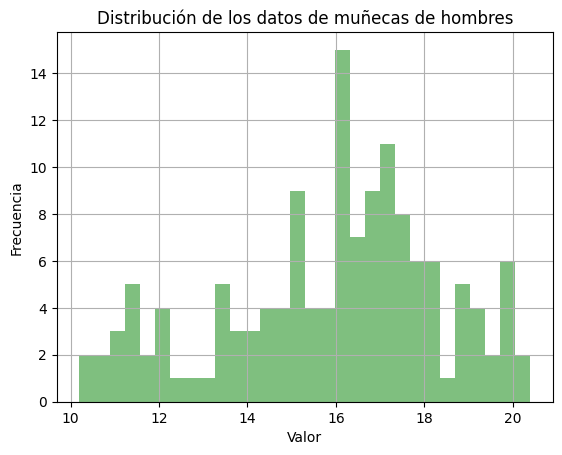

In [ ]:
plt.hist(munecas_hombres, bins=30, alpha=0.5, color='g')

# mostrar el histograma
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de los datos de muñecas de hombres')
plt.grid(True)
plt.show()

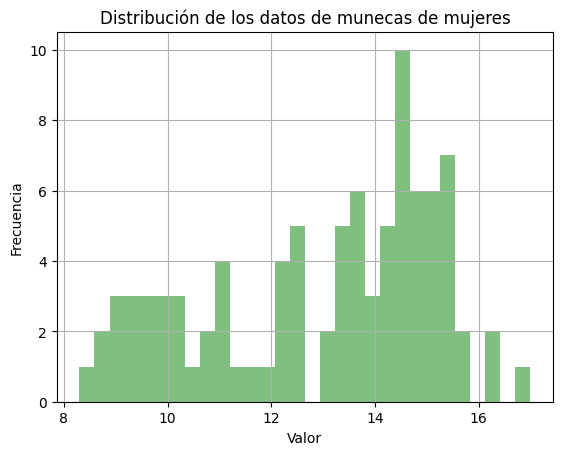

In [ ]:
plt.hist(munecas_mujeres, bins=30, alpha=0.5, color='g')

# mostrar el histograma
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de los datos de munecas de mujeres')
plt.grid(True)
plt.show()

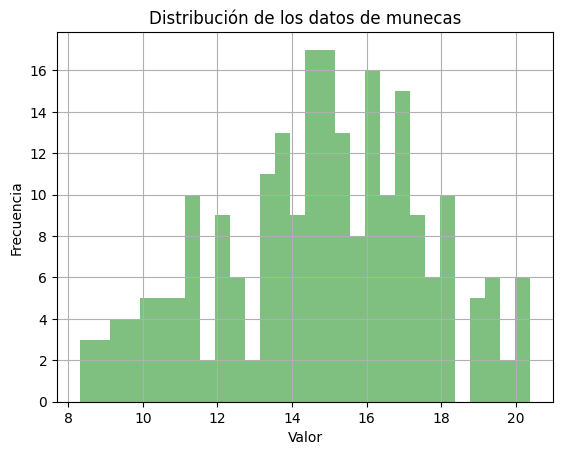

In [ ]:
plt.hist(munecas, bins=30, alpha=0.5, color='g')

# mostrar el histograma
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de los datos de munecas')
plt.grid(True)
plt.show()

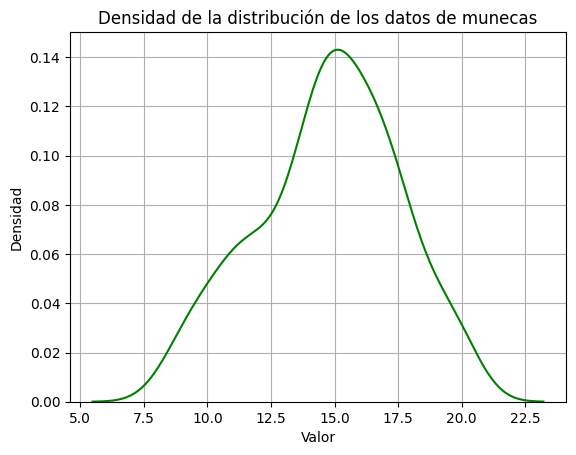

In [ ]:
sns.kdeplot(munecas, color='g')

# mostrar el gráfico
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Densidad de la distribución de los datos de munecas')
plt.grid(True)
plt.show()

# Pruebas de hipotesis 

In [ ]:
k2, p = stats.normaltest(munecas)

alpha = 0.05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("No viene de una distribución normal")
    print("p-value:", p)
else:
    print("Viene de una distribución normal")
    print("p-value:", p)

No viene de una distribución normal
p-value: 0.03803414793681541


In [217]:
W, p = stats.shapiro(munecas)

alpha = 0.05
if p < alpha:  # hipótesis nula: los datos provienen de una distribución normal
    print("La hipótesis nula puede ser rechazada, los datos no provienen de una distribución normal")
else:
    print("La hipótesis nula no puede ser rechazada, los datos provienen de una distribución normal")

La hipótesis nula puede ser rechazada, los datos no provienen de una distribución normal
